<a href="https://colab.research.google.com/github/Abirmai369/CodeAlpha_car-price-prediction/blob/main/car_price_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Necessary libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

 Loading the data

In [29]:
df = pd.read_csv('car data.csv')

Data Inspection

In [30]:
print("First few rows of the dataset:")
print(df.head())
print("\nData info:")
print(df.info())

First few rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  30

Feature Engineering

In [31]:
df['Brand'] = df['Car_Name'].str.split().str[0]
df.drop(['Car_Name'], axis=1, inplace=True)
df['Car_Age'] = 2023 - df['Year']
df.drop(['Year'], axis=1, inplace=True)

Preprocessing Categorical Features

In [32]:
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission', 'Brand']
numerical_features = ['Driven_kms', 'Present_Price', 'Owner', 'Car_Age']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)

X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

X_processed = preprocessor.fit_transform(X)

Correlation Heatmap

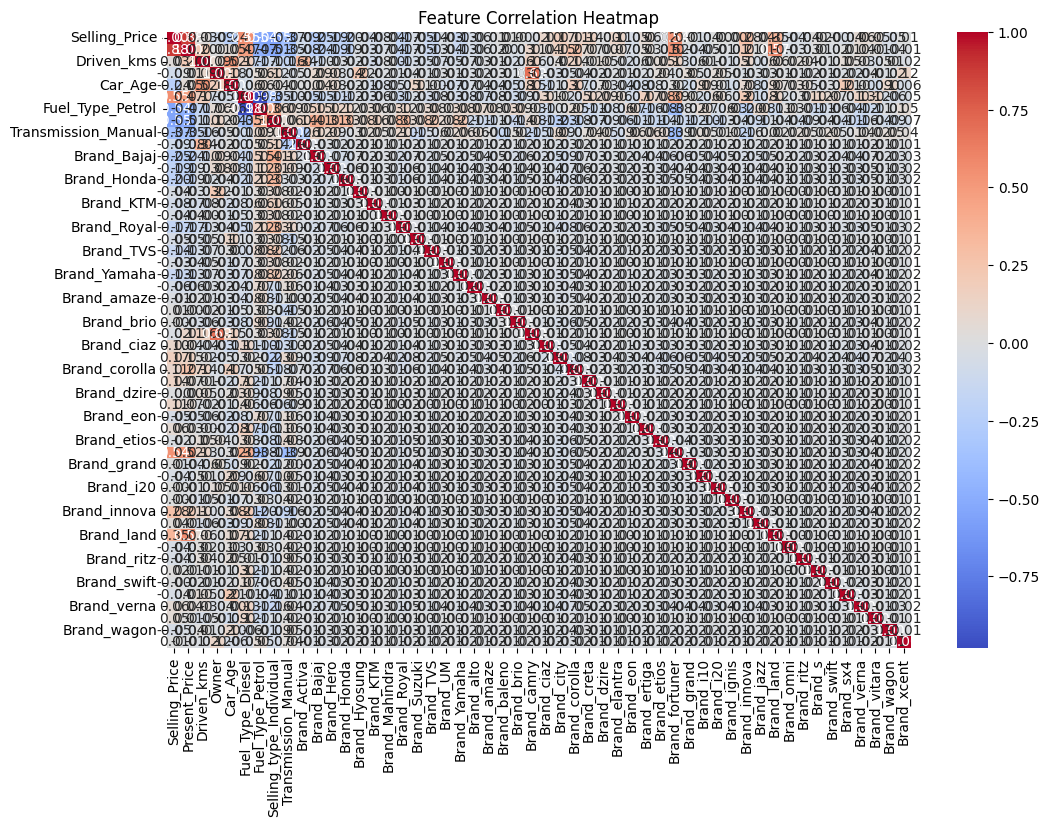

In [42]:
df_encoded = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

Train/Test Split



In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

Train the model


In [34]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

 Model Evaluation


In [35]:
y_pred = model.predict(X_test)

print("\nModel Evaluation:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")


Model Evaluation:
R² Score: 0.9632
MAE: 0.6349
RMSE: 0.9209


predicted


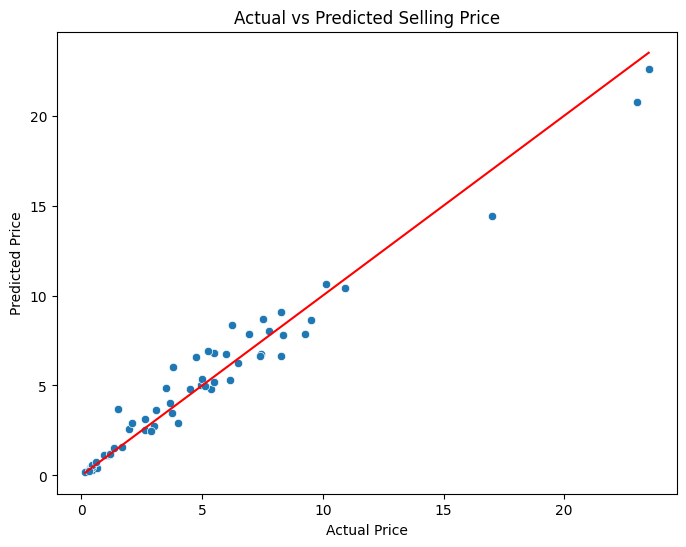

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()

Function to Predict New Car


In [43]:
def predict_car_price(car_data):
    """
    car_data should be a dictionary with the following keys:
    Car_Name, Year, Present_Price, Driven_kms, Fuel_Type, Selling_type, Transmission, Owner
    """
    # Convert to DataFrame
    input_df = pd.DataFrame([car_data])

    # Feature Engineering
    input_df['Brand'] = input_df['Car_Name'].str.split().str[0]
    input_df['Car_Age'] = 2023 - input_df['Year']
    input_df.drop(['Car_Name', 'Year'], axis=1, inplace=True)

    # Transform input
    processed_input = preprocessor.transform(input_df)

    # Predict
    predicted_price = model.predict(processed_input)[0]
    return predicted_pr